# Visualizing some of the insights

In [1]:
import duckdb
import matplotlib.pyplot as plt

conn = duckdb.connect("../data/sakila.duckdb")
conn.sql("SET search_path='staging';")

### Top 5 costumers

In [2]:
top_five = conn.sql("""--sql
SELECT
    cu.first_name || ' ' || cu.last_name AS customer,
    SUM(p.amount) AS total_amount
FROM
    customer cu
    JOIN payment p ON p.customer_id = cu.customer_id
GROUP BY
    customer
LIMIT
    5;
    """).df()

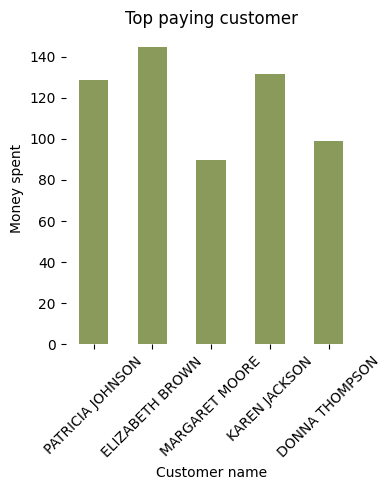

In [3]:
fig, ax = plt.subplots(figsize=(4, 5))

ax.bar(top_five["customer"], top_five["total_amount"], color="#8A9A5B", width=0.5)

ax.set(
    title="Top paying customer",
    xlabel="Customer name",
    ylabel="Money spent",
)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.setp(ax.get_xticklabels(), rotation=45)

fig.tight_layout()

### Top providing category

In [4]:
top_categories = conn.sql("""--sql
SELECT
    c.name AS category,
    SUM(p.amount) AS total_revenue
FROM
    category c
    JOIN film_category fc ON fc.category_id = c.category_id
    JOIN film f ON fc.film_id = f.film_id
    JOIN inventory i ON f.film_id = i.film_id
    JOIN rental r ON i.inventory_id = r.inventory_id
    JOIN payment p ON r.rental_id = p.rental_id
GROUP BY
    category;
        """).df()

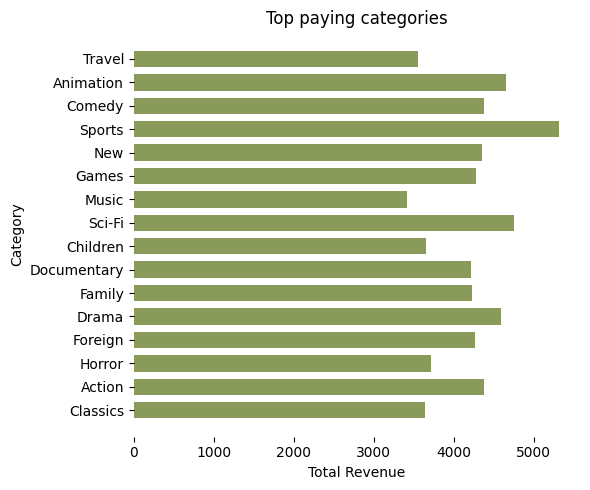

In [5]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.barh(
    top_categories["category"],
    top_categories["total_revenue"],
    height=0.7,
    color="#8A9A5B",
)

ax.set(
    title="Top paying categories",
    xlabel="Total Revenue",
    ylabel="Category",
)

for spine in ax.spines.values():
    spine.set_visible(False)

fig.tight_layout()


In [6]:
conn.close()